In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [152]:
df = pd.read_csv("./HousingData.csv")

In [153]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [155]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Checking And Dealing with Null values

In [157]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [158]:
# Crim, Zn, Indus, chas, lstat, age has 20 null values.

# CHAS is a catagorical column so ,I will replace all 
# the missing values with 0.
df["CHAS"] = df["CHAS"].fillna(0)

#lSTAT, Zn, Indus, chas, age are continous data , 
# i will replace mising value with mean.
df["LSTAT"] = df["LSTAT"].fillna(df["LSTAT"].mean())
df["ZN"] = df["ZN"].fillna(df["ZN"].mean())
df["INDUS"] = df["INDUS"].fillna(df["INDUS"].mean())
df["CRIM"] = df["CRIM"].fillna(df["CRIM"].mean())
df["AGE"] = df["AGE"].fillna(df["AGE"].mean())

In [159]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Checking for Outliers

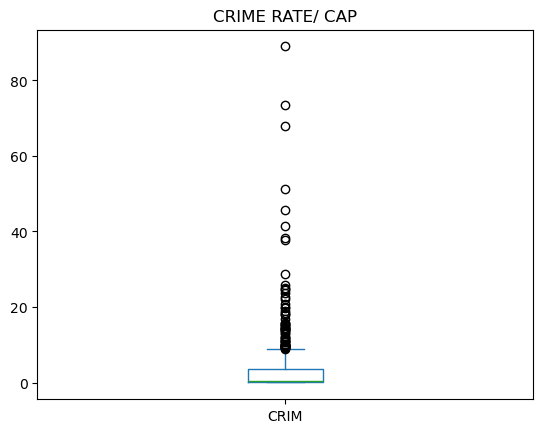

367    13.5222
373    11.1081
374    18.4982
375    19.6091
376    15.2880
Name: CRIM, dtype: float64

In [161]:
# Numerical columns are (CRIM, ZN, INDUS, NOX, RM, AGE, 
# DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV).
# Now LETS visulize outliers with box plot
df["CRIM"].plot(kind = "box", title = "CRIME RATE/ CAP")
plt.show()
df[df["CRIM"] > 10]["CRIM"].head()

<Axes: ylabel='Frequency'>

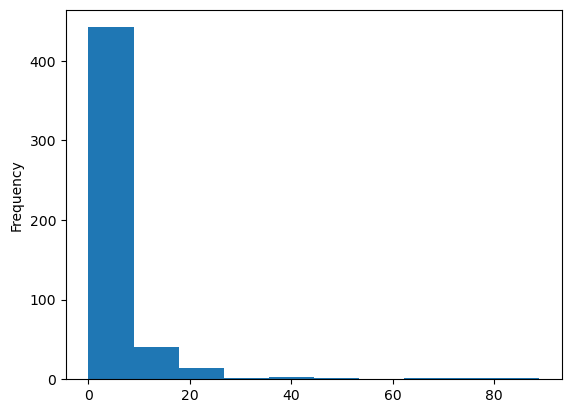

In [162]:
df["CRIM"].plot(kind = "hist")
# We can see our CRIM column Right Skewed and 
# Box plot was showing many outliers.
# But we cant remove all of them so i will only 
# consider CRIM values below 30.

In [163]:
df[df["CRIM"] > 30]["CRIM"].count()

8

In [164]:
df = df[df["CRIM"] < 30]  # removing after 30

In [165]:
df["CRIM"].count()

498

<Axes: >

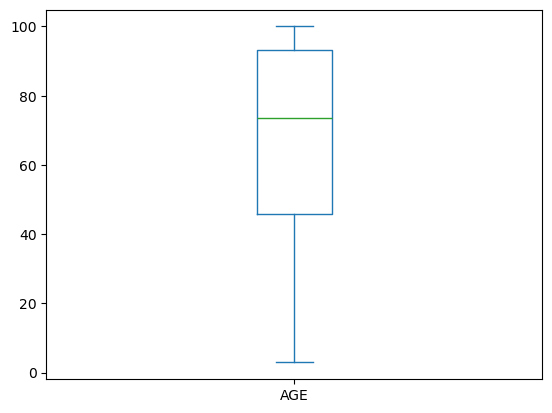

In [166]:
# Now for AGE column
df["AGE"].plot(kind = "box")
# NO outliers

<Axes: >

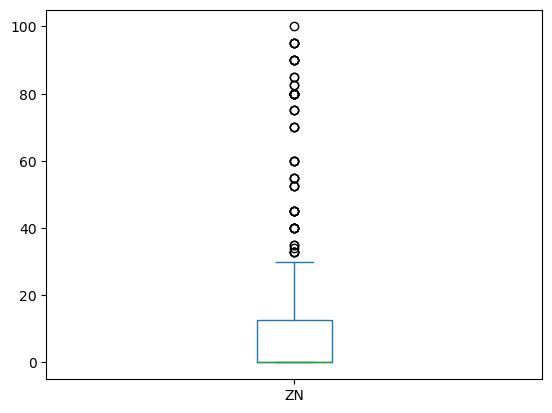

In [167]:
# Now for  ZN
df["ZN"].plot(kind = "box")
# ZN have some outliers

<Axes: ylabel='Frequency'>

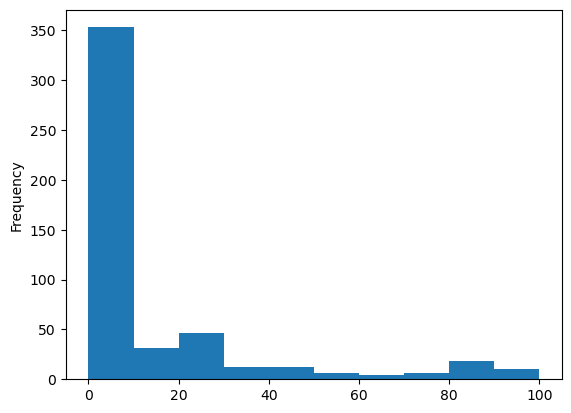

In [168]:
# Lets check the skewness of ZN
df["ZN"].plot(kind = "hist")
# WE can se ZN is right skewed, i think these outliers are import, 
# so will not remove these.


In [169]:
# Checking other Function using IQR 

def  check_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    return f"Total outliers in {col} column: {len(outliers)}"

In [170]:
# USing the function for other columns

In [171]:
# For  INDUS
check_outliers("INDUS")

'Total outliers in INDUS column: 0'

In [172]:
# For  NOX
check_outliers("NOX")

'Total outliers in NOX column: 0'

In [173]:
# For  RM
check_outliers("RM")

'Total outliers in RM column: 29'

In [174]:
# For  DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV
check_outliers("DIS")

'Total outliers in DIS column: 5'

In [175]:
# For RAD, TAX, PTRATIO, B, LSTAT, MEDV
check_outliers("RAD")

'Total outliers in RAD column: 124'

In [176]:
# For TAX, PTRATIO, B, LSTAT, MEDV
check_outliers("TAX")

'Total outliers in TAX column: 0'

In [177]:
# For PTRATIO, B, LSTAT, MEDV
check_outliers("PTRATIO")

'Total outliers in PTRATIO column: 0'

In [178]:
# For B, LSTAT, MEDV
check_outliers("B")

'Total outliers in B column: 73'

In [179]:
# For LSTAT, MEDV
check_outliers("LSTAT")

'Total outliers in LSTAT column: 10'

In [180]:
# For MEDV
check_outliers("MEDV")

'Total outliers in MEDV column: 38'

# Assumptions of Linear Regression

 ## 1. Linearity Between Input and output variable

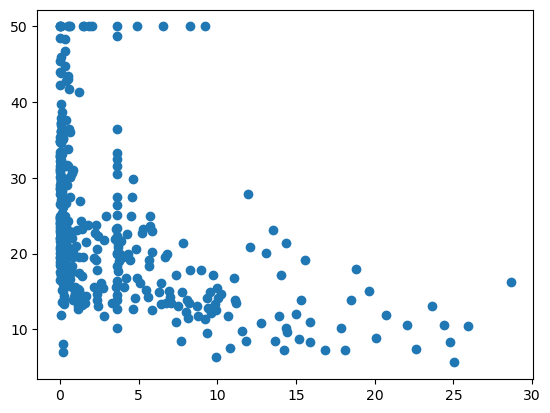

In [183]:
# Between CRIM and MEDV
plt.scatter(df["CRIM"], df["MEDV"])

# No linearity

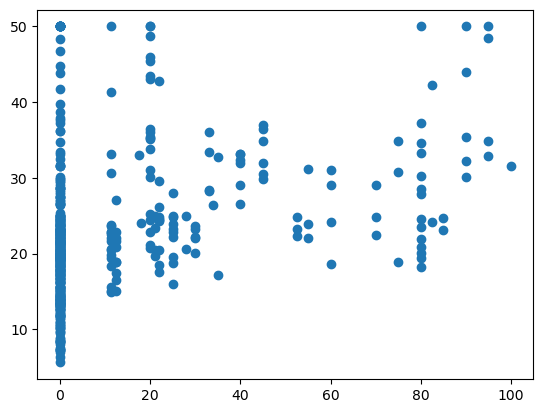

In [184]:
# Between ZN and MEDV
plt.scatter(df["ZN"], df["MEDV"])
# No linearity

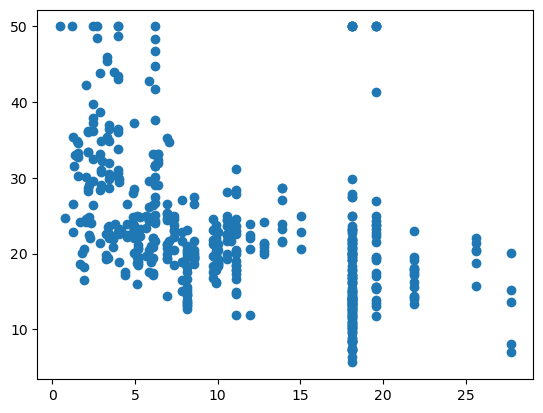

In [185]:
# Between INDUS and MEDV
plt.scatter(df["INDUS"], df["MEDV"])

# NO linearity

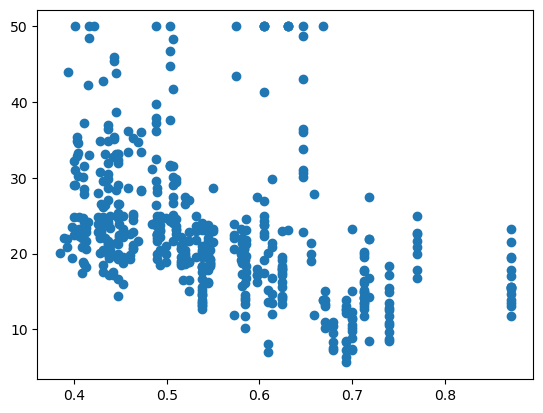

In [186]:
# Between NOX and MEDV
plt.scatter(df["NOX"], df["MEDV"])
# NOT linear

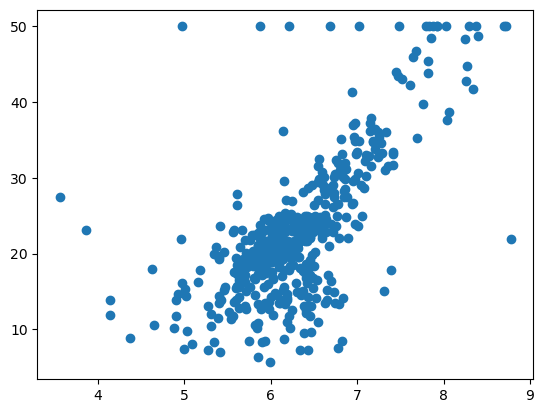

In [187]:
# Between RM and MEDV
plt.scatter(df["RM"], df["MEDV"])
# data is linear

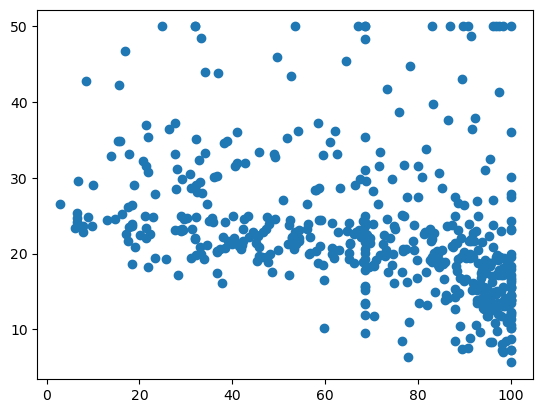

In [188]:
# Between AGE and MEDV
plt.scatter(df["AGE"], df["MEDV"])
# data is not linear

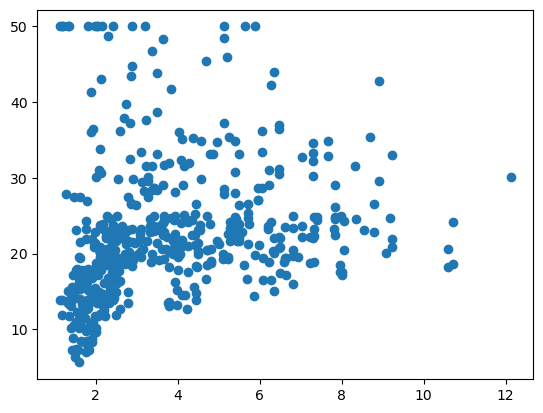

In [189]:
# Between DIS and MEDV
plt.scatter(df["DIS"], df["MEDV"])
# data is not  linear

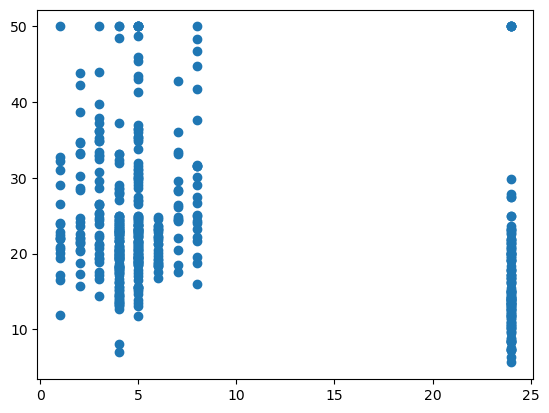

In [190]:
# Between RAD and MEDV
plt.scatter(df["RAD"], df["MEDV"])
# data is not linear

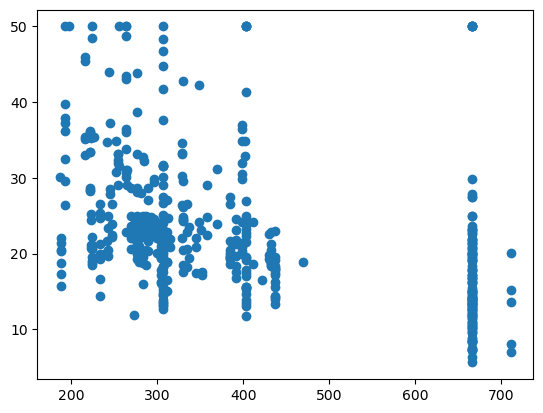

In [191]:
# Between TAX and MEDV
plt.scatter(df["TAX"], df["MEDV"])
# data is not linear

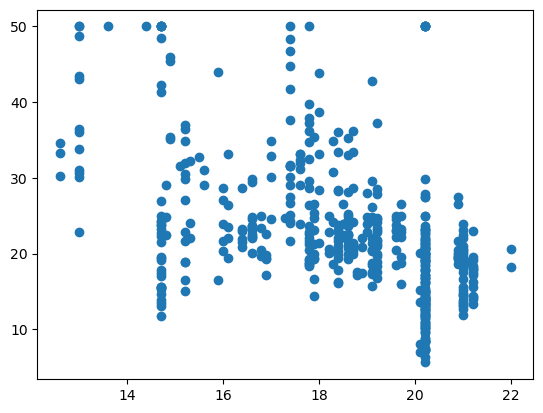

In [192]:
# Between PTRATIOand MEDV
plt.scatter(df["PTRATIO"], df["MEDV"])
# data is not linear

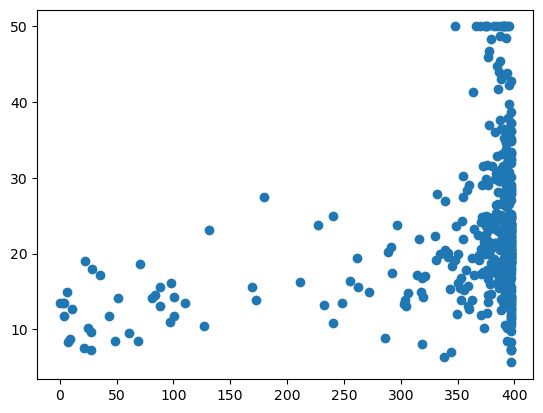

In [193]:
# Between B and MEDV
plt.scatter(df["B"], df["MEDV"])
# data is not linear

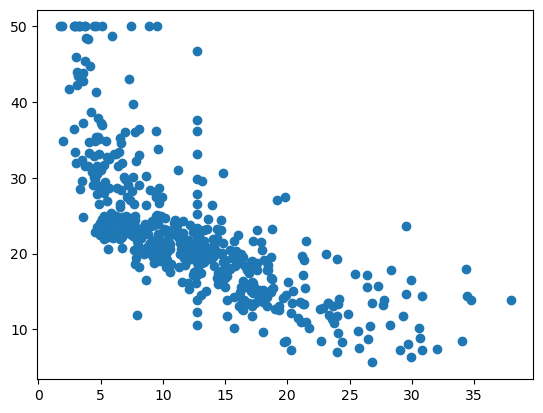

In [194]:
# Between LSTAT and MEDV
plt.scatter(df["LSTAT"], df["MEDV"])
# data is linear

## 2.No Multicollinearity

In [196]:
corr_input = df.drop(columns=['MEDV'])
correlation_matrix = corr_input.corr()
print(correlation_matrix)

# There is a strong correlation between RAD and TAX, 
# NOX and INDUS, LSTAT and MEDV
# -ve COrrelation Between AGE and NOX, DIS and age

# Hence there is Multicollinearity

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.240250  0.502504 -0.047403  0.539137 -0.280194  0.434042   
ZN      -0.240250  1.000000 -0.511510 -0.036401 -0.500641  0.314885 -0.539350   
INDUS    0.502504 -0.511510  1.000000  0.059252  0.736772 -0.376418  0.608790   
CHAS    -0.047403 -0.036401  0.059252  1.000000  0.076085  0.104818  0.078298   
NOX      0.539137 -0.500641  0.736772  0.076085  1.000000 -0.294887  0.707943   
RM      -0.280194  0.314885 -0.376418  0.104818 -0.294887  1.000000 -0.232771   
AGE      0.434042 -0.539350  0.608790  0.078298  0.707943 -0.232771  1.000000   
DIS     -0.457819  0.637806 -0.694263 -0.097781 -0.765694  0.196699 -0.720272   
RAD      0.787968 -0.302154  0.583333  0.003913  0.602714 -0.196439  0.437890   
TAX      0.733140 -0.304079  0.709949 -0.029805  0.661067 -0.282130  0.490397   
PTRATIO  0.337379 -0.400302  0.376516 -0.106594  0.178063 -0.351611  0.253764   
B       -0.402505  0.167035 

## Normality of Residuals

#### Implement Linear regression

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [200]:
X = df.drop('MEDV', axis=1)

In [201]:
y = df["MEDV"]

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [203]:
LR = LinearRegression()

In [204]:
LR.fit(X_train, y_train)

LinearRegression()

In [205]:
predictions = LR.predict(X_test)
print(predictions)

[17.62326148 28.61415983 20.39164676 35.18125488 16.45739696 17.85432553
 10.98229505 35.57816063 34.16479223 24.4483229  17.62747838 20.46507844
 21.37884503 30.26489328 13.88473077 32.80994456 20.01039705 35.46181447
 15.49483544 27.46257598 21.6740752  30.21329494 25.17189394 17.77347133
 21.74917178 16.79517391 24.92359572  6.03088297 10.76933401 17.6607319
 31.50768153 23.02847252 28.93708744 27.85344707 19.51669949 21.17284258
 17.06895572 22.55787799 20.59780837 18.92946583 27.95593612 19.24828022
 24.2706537  21.33426051 16.84650522 16.70873981 37.70251544 17.66733867
 18.00802741 15.57784254 15.84339349 14.61547527 13.5546531  24.71208222
 15.89701868 28.96299271 22.84062321 18.19664441  9.93895138 15.69795431
 31.49625198 22.64003986 29.18399166 27.10152268 25.49788501 35.2576319
 22.56892024 10.09057394 36.52800019 25.39219651 23.64835977 25.73682735
 21.02867647 21.0126528  32.17761163  6.28585383  3.3904332  36.59996596
 13.05158357 30.23239989 27.83092376 31.05699715 27.4

In [206]:
Residuals = y_test - predictions

Text(0.5, 1.0, 'KDE of Residuals')

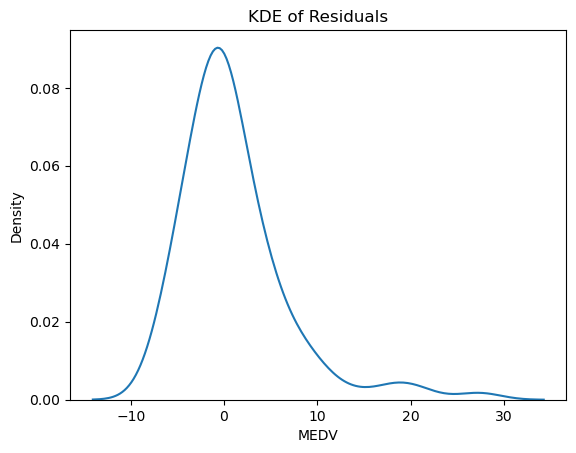

In [207]:
sns.kdeplot(Residuals)  
plt.title('KDE of Residuals')
# Kde curve is not perfactly normal as you can see from 10 to 30

# Homoscedasticity 

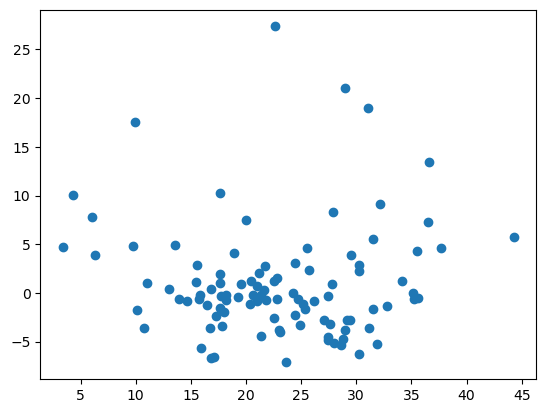

In [209]:
plt.scatter(predictions, Residuals)
# Uniform Scatter plot

# No autocorrelation

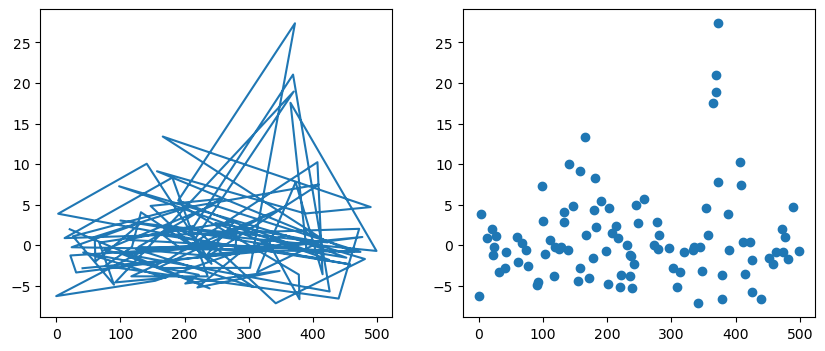

In [211]:
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.plot( Residuals.index, Residuals)
plt.subplot(1,2,2)
plt.scatter( Residuals.index, Residuals)
# No autocorrelation

## Conclusion: 
- There is multicollinearity in our data, there is no linearity between multiple columns .
- So right now our data is not suitable for multiple linear regression  